In [1]:
!pip install apyori

In [2]:
import pandas as pd
import seaborn as sns
from apyori import apriori
import matplotlib.pyplot as plt

In [3]:
# read dataset
data = pd.read_csv("Groceries.csv",header=None)

In [4]:
# convert to dataframe
df = pd.DataFrame(data)

In [5]:
# top 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#display bottom 5 rows
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9834,chicken,tropical fruit,other vegetables,vinegar,shopping bags,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# display the items in dataset
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
mydict = {}
row = len(df[0])
col = 32
for i in range(row):
    for j in range(col):
        if type(df[j][i]) == type(""):
            if df[j][i] not in mydict.keys():
                mydict.update({df[j][i]:1})
            else:
                mydict.update({df[j][i]:mydict[df[j][i]]+1})
print(mydict)


{'citrus fruit': 814, 'semi-finished bread': 174, 'margarine': 576, 'ready soups': 18, 'tropical fruit': 1032, 'yogurt': 1372, 'coffee': 571, 'whole milk': 2513, 'pip fruit': 744, 'cream cheese': 390, 'meat spreads': 42, 'other vegetables': 1903, 'condensed milk': 101, 'long life bakery product': 368, 'butter': 545, 'rice': 75, 'abrasive cleaner': 35, 'rolls/buns': 1809, 'UHT-milk': 329, 'bottled beer': 792, 'liquor (appetizer)': 78, 'potted plants': 170, 'cereals': 56, 'white bread': 414, 'bottled water': 1087, 'chocolate': 488, 'curd': 524, 'flour': 171, 'dishes': 173, 'beef': 516, 'frankfurter': 580, 'soda': 1715, 'chicken': 422, 'sugar': 333, 'fruit/vegetable juice': 711, 'newspapers': 785, 'packaged fruit/vegetables': 128, 'specialty bar': 269, 'butter milk': 275, 'pastry': 875, 'processed cheese': 163, 'detergent': 189, 'root vegetables': 1072, 'frozen dessert': 106, 'sweet spreads': 89, 'salty snack': 372, 'waffles': 378, 'candy': 294, 'bathroom cleaner': 27, 'canned beer': 764,

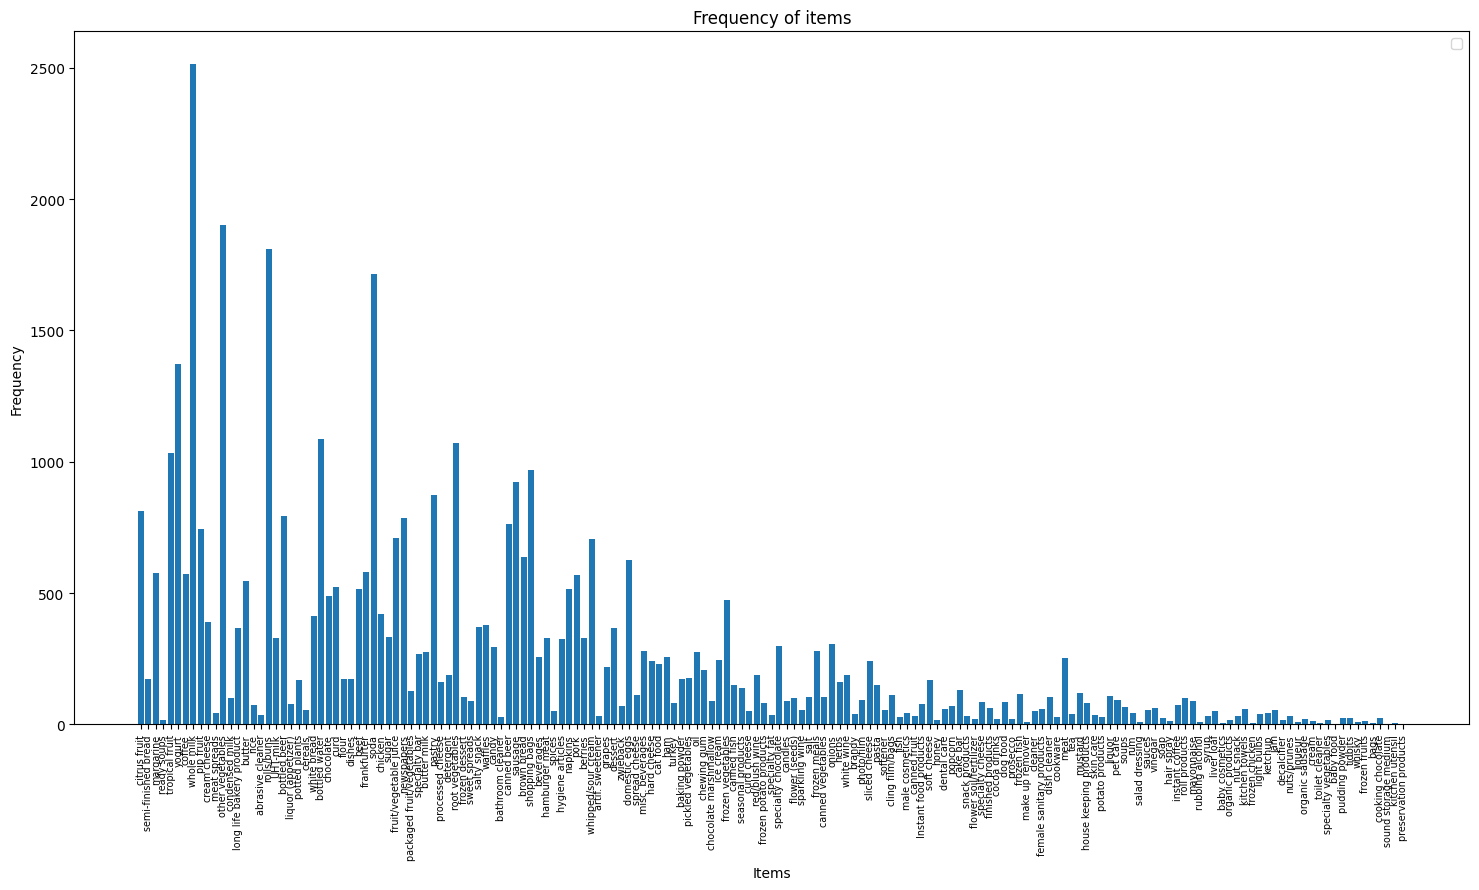

In [17]:
# plot bar chart
fig, axes = plt.subplots(ncols=1,nrows=1,figsize=(18,9))
plt.title("Frequency of items")
plt.xlabel('Items')
plt.ylabel('Frequency')
plt.legend()
items = list(mydict.keys())
values = list(mydict.values())


plt.bar(range(len(mydict)), values, tick_label=items)
plt.xticks(rotation = 90,fontsize=6.9)
plt.show()

In [10]:
records = []
for i in range(0,9835):
  records.append([str(df.values[i,j]) for j in range(0,32)])

# print(records)


In [11]:
# GENERATE ASSOCIATION RULES
association_rules = apriori(records, min_threshold=2)
association_results = list(association_rules)

In [12]:
# Print the length of associations formed
print(len(association_results))

17


In [18]:
# print the association rules along with support & confidence
print(association_results)

[RelationRecord(items=frozenset({'bottled water'}), support=0.11052364006100661, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'bottled water'}), confidence=0.11052364006100661, lift=1.0)]), RelationRecord(items=frozenset({'nan'}), support=0.9998983223182512, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'nan'}), confidence=0.9998983223182512, lift=1.0)]), RelationRecord(items=frozenset({'other vegetables'}), support=0.1934926283680732, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'other vegetables'}), confidence=0.1934926283680732, lift=1.0)]), RelationRecord(items=frozenset({'rolls/buns'}), support=0.18393492628368074, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'rolls/buns'}), confidence=0.18393492628368074, lift=1.0)]), RelationRecord(items=frozenset({'root vegetables'}), support=0.10899847483477376, ordered_statistics=[OrderedStatistic(